# Image Transformation
このノートブックでは、アフィン変換と透視変換を用いて画像変換を行います。

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像読み込み
image_path = './sample_image/Lenna.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


## 1. アフィン変換 (Affine Transformation)
アフィン変換は、平行を保ったまま画像の位置や角度、スケールを変更する変換です。この変換では、元の画像の3点の位置を指定して新しい座標に移動することで、回転やスケーリング、平行移動などを実現できます。アフィン変換後も、元の画像の直線や角度は保存されます。

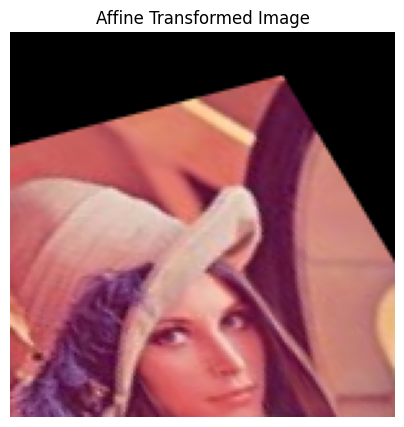

In [2]:
# アフィン変換
rows, cols = image.shape[:2]
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M = cv2.getAffineTransform(pts1, pts2)
affine_transformed = cv2.warpAffine(image, M, (cols, rows))

# 結果表示
plt.figure(figsize=(5, 5))
plt.title("Affine Transformed Image")
plt.imshow(affine_transformed)
plt.axis('off')
plt.show()

## 2. 透視変換 (Perspective Transformation)
透視変換は、画像の遠近感を操作するための変換です。4つの対応点を指定して、画像を任意の視点から見たように変形できます。これにより、画像の一部が奥行き方向に遠ざかる（または近づく）ような変形を行うことができます。

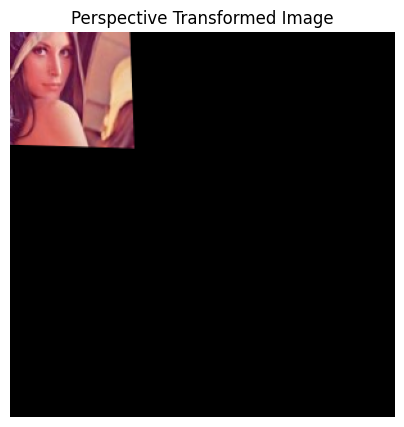

In [3]:
# 透視変換
pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
M = cv2.getPerspectiveTransform(pts1, pts2)
perspective_transformed = cv2.warpPerspective(image, M, (300, 300))

# 結果表示
plt.figure(figsize=(5, 5))
plt.title("Perspective Transformed Image")
plt.imshow(perspective_transformed)
plt.axis('off')
plt.show()